# Movie Recommendation System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.getcwd())  # Current working directory

C:\Users\haris\OneDrive\Desktop\final_project


Reading the Datasets

In [3]:
df1 = pd.read_csv('links.csv')

In [4]:
df2 = pd.read_csv('movies.csv')

In [5]:
df3 = pd.read_csv('ratings.csv')

In [6]:
df4 = pd.read_csv('tags.csv')

In [7]:
df1.info()
df2.info()
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB

In [8]:
# Merging all datasets using movieId as the anchor
df = df1.merge(df2, on='movieId', how='outer') \
               .merge(df3, on='movieId', how='outer') \
               .merge(df4, on=['movieId', 'userId', 'timestamp'], how='outer')


In [9]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,2.5,1.169265e+09,NaN
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,3.0,8.500851e+08,NaN
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.0,1.027306e+09,NaN
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,9.747045e+08,NaN
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20.0,5.0,1.553184e+09,NaN
...,...,...,...,...,...,...,...,...,...
34003306,90645,NaN,NaN,NaN,NaN,162279.0,NaN,1.320818e+09,Rafe Spall
34003307,91079,NaN,NaN,NaN,NaN,162279.0,NaN,1.322337e+09,Anton Yelchin
34003308,91079,NaN,NaN,NaN,NaN,162279.0,NaN,1.322337e+09,Felicity Jones
34003309,91658,NaN,NaN,NaN,NaN,162279.0,NaN,1.325828e+09,Rooney Mara


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34003311 entries, 0 to 34003310
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   imdbId     float64
 2   tmdbId     float64
 3   title      object 
 4   genres     object 
 5   userId     float64
 6   rating     float64
 7   timestamp  float64
 8   tag        object 
dtypes: float64(5), int64(1), object(3)
memory usage: 2.3+ GB


In [11]:
missing_values = df.isnull().sum()
print(missing_values)

movieId             0
imdbId        1999518
tmdbId        2004246
title         1999518
genres        1999518
userId           3153
rating        2002671
timestamp        3153
tag          32003256
dtype: int64


In [12]:
# Removing rows with 3 or more missing values
df = df.dropna(thresh=df.shape[1] - 2)  # Keep rows with at least (total columns - 2) non-NA values

In [13]:
missing_values2 = df.isnull().sum()
print(missing_values2)

movieId             0
imdbId              0
tmdbId           4726
title               0
genres              0
userId              0
rating              0
timestamp           0
tag          32000086
dtype: int64


In [14]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,2.5,1.169265e+09,NaN
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,3.0,8.500851e+08,NaN
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.0,1.027306e+09,NaN
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,9.747045e+08,NaN
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20.0,5.0,1.553184e+09,NaN
...,...,...,...,...,...,...,...,...,...
32003788,292731,26812510.0,1032473.0,The Monroy Affaire (2022),Drama,50685.0,4.0,1.697075e+09,NaN
32003789,292737,14907358.0,986674.0,Shelter in Solitude (2023),Comedy|Drama,165364.0,1.5,1.697146e+09,NaN
32003790,292753,12388280.0,948139.0,Orca (2023),Drama,150812.0,4.0,1.697141e+09,NaN
32003791,292755,64027.0,182776.0,The Angry Breed (1968),Drama,91097.0,1.0,1.697145e+09,NaN


In [15]:
# Filter users who have rated at least 10 movies
user_counts = df["userId"].value_counts()
valid_users = user_counts[user_counts >= 10].index

In [16]:
# Sample N users from the valid ones
n_users = 1000  # Adjust based on desired sample size
sampled_users = np.random.choice(valid_users, size=min(n_users, len(valid_users)), replace=False)

# Get all ratings from the sampled users
df_sample = df[df["userId"].isin(sampled_users)]

# Save the sample
df_sample.to_csv("sample_dataset.csv", index=False)

print(f"Sampled {len(sampled_users)} users and {len(df_sample)} ratings.")

Sampled 1000 users and 145728 ratings.


In [17]:
# I load a pre-sampled dataset below as every time I run the code it generates a new sample*

In [18]:
df_sample = pd.read_csv('sample_df.csv')

In [19]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,596.0,5.0,8.633509e+08,NaN
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,775.0,4.0,8.520096e+08,NaN
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2129.0,4.0,1.370793e+09,NaN
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2398.0,4.0,9.745988e+08,NaN
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2497.0,4.5,1.425331e+09,NaN
...,...,...,...,...,...,...,...,...,...
149205,289691,28089651.0,1151353.0,Untold: Johnny Football (2023),Documentary,180749.0,1.5,1.693861e+09,NaN
149206,289807,21933210.0,1012801.0,Barbie: Mermaid Power (2022),Animation,139369.0,4.0,1.691979e+09,NaN
149207,290787,15944018.0,1122634.0,Once Upon a Crime (2023),Adventure|Comedy|Fantasy,139369.0,3.5,1.694965e+09,NaN
149208,291821,41421.0,66867.0,Goofy Gymnastics (1949),Animation|Comedy,139369.0,4.5,1.696087e+09,NaN


In [20]:
# Sort by movieId
df_sample = df_sample.sort_values(by="movieId").reset_index(drop=True)

In [21]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,596.0,5.0,8.633509e+08,NaN
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129431.0,4.5,1.608658e+09,NaN
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129309.0,5.0,1.200154e+09,NaN
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128776.0,3.0,8.481199e+08,NaN
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128416.0,3.5,1.673749e+09,NaN
...,...,...,...,...,...,...,...,...,...
149205,289691,28089651.0,1151353.0,Untold: Johnny Football (2023),Documentary,180749.0,1.5,1.693861e+09,NaN
149206,289807,21933210.0,1012801.0,Barbie: Mermaid Power (2022),Animation,139369.0,4.0,1.691979e+09,NaN
149207,290787,15944018.0,1122634.0,Once Upon a Crime (2023),Adventure|Comedy|Fantasy,139369.0,3.5,1.694965e+09,NaN
149208,291821,41421.0,66867.0,Goofy Gymnastics (1949),Animation|Comedy,139369.0,4.5,1.696087e+09,NaN


In [22]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149210 entries, 0 to 149209
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    149210 non-null  int64  
 1   imdbId     149210 non-null  float64
 2   tmdbId     149183 non-null  float64
 3   title      149210 non-null  object 
 4   genres     149210 non-null  object 
 5   userId     149210 non-null  float64
 6   rating     149210 non-null  float64
 7   timestamp  149210 non-null  float64
 8   tag        0 non-null       float64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.2+ MB


In [23]:
# Drop the 'tag' column
df_sample = df_sample.drop(columns=['tag'])

In [24]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,596.0,5.0,8.633509e+08
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129431.0,4.5,1.608658e+09
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129309.0,5.0,1.200154e+09
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128776.0,3.0,8.481199e+08
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128416.0,3.5,1.673749e+09
...,...,...,...,...,...,...,...,...
149205,289691,28089651.0,1151353.0,Untold: Johnny Football (2023),Documentary,180749.0,1.5,1.693861e+09
149206,289807,21933210.0,1012801.0,Barbie: Mermaid Power (2022),Animation,139369.0,4.0,1.691979e+09
149207,290787,15944018.0,1122634.0,Once Upon a Crime (2023),Adventure|Comedy|Fantasy,139369.0,3.5,1.694965e+09
149208,291821,41421.0,66867.0,Goofy Gymnastics (1949),Animation|Comedy,139369.0,4.5,1.696087e+09


In [25]:
# Convert timestamp to datetime format
df_sample['timestamp'] = pd.to_datetime(df_sample['timestamp'], unit='s')

In [26]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,596.0,5.0,1997-05-11 11:42:25
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129431.0,4.5,2020-12-22 17:20:19
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129309.0,5.0,2008-01-12 16:12:00
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128776.0,3.0,1996-11-16 04:51:18
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128416.0,3.5,2023-01-15 02:12:03
...,...,...,...,...,...,...,...,...
149205,289691,28089651.0,1151353.0,Untold: Johnny Football (2023),Documentary,180749.0,1.5,2023-09-04 20:59:15
149206,289807,21933210.0,1012801.0,Barbie: Mermaid Power (2022),Animation,139369.0,4.0,2023-08-14 02:06:46
149207,290787,15944018.0,1122634.0,Once Upon a Crime (2023),Adventure|Comedy|Fantasy,139369.0,3.5,2023-09-17 15:29:16
149208,291821,41421.0,66867.0,Goofy Gymnastics (1949),Animation|Comedy,139369.0,4.5,2023-09-30 15:14:32


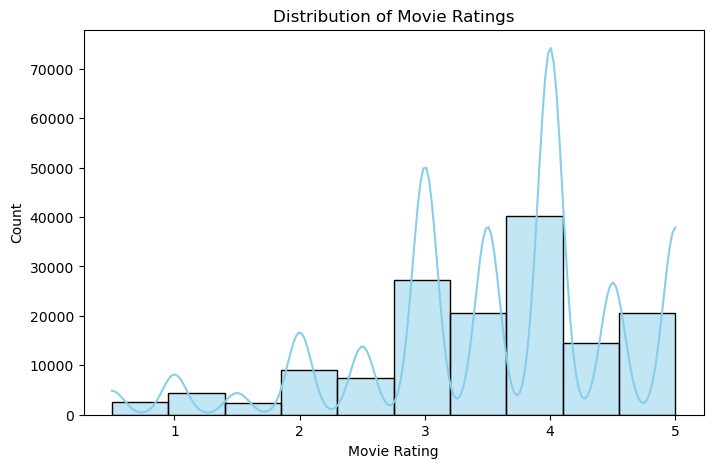

In [27]:
# Plot the rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_sample['rating'], bins=10, kde=True, color="skyblue")
plt.xlabel("Movie Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

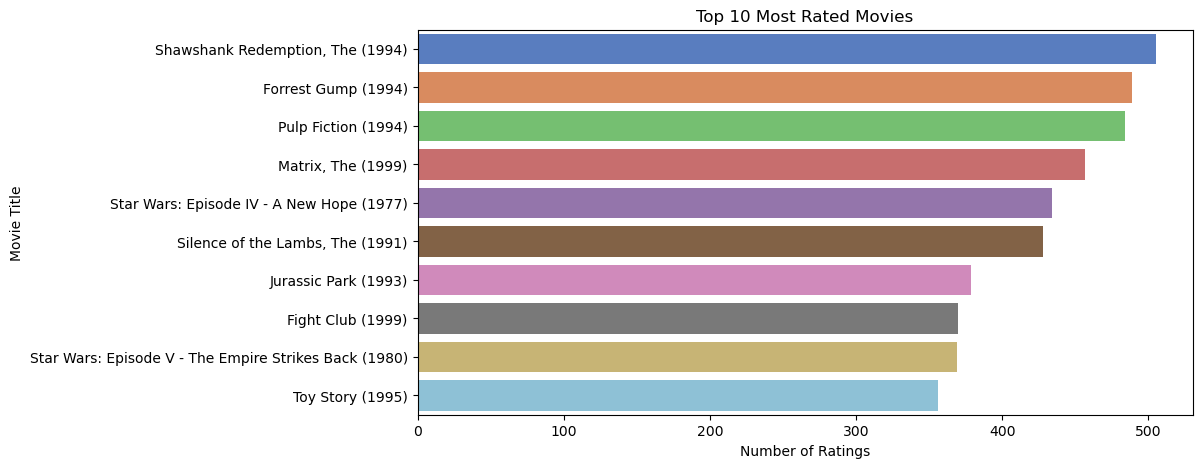

In [53]:
top_movies = df_sample['title'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_movies.values, y=top_movies.index, palette="muted")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Rated Movies")
plt.show()


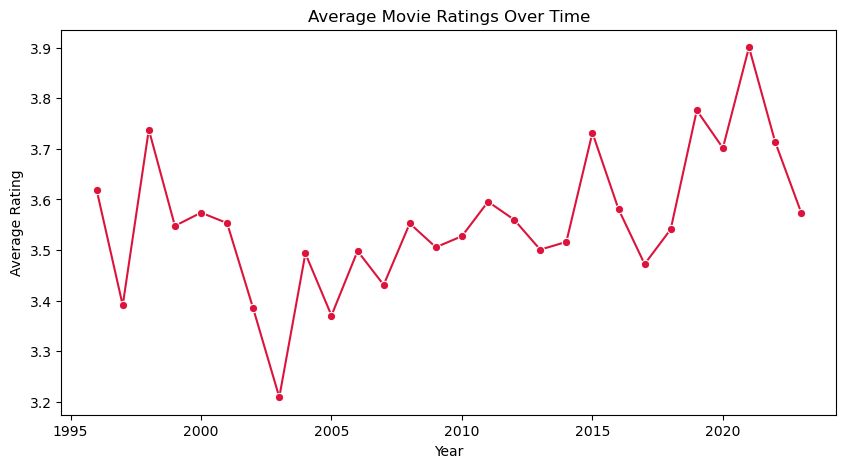

In [29]:
df_sample['year'] = df_sample['timestamp'].dt.year  # Extract year from timestamp

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sample.groupby('year')['rating'].mean(), marker="o", color="crimson")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings Over Time")
plt.show()


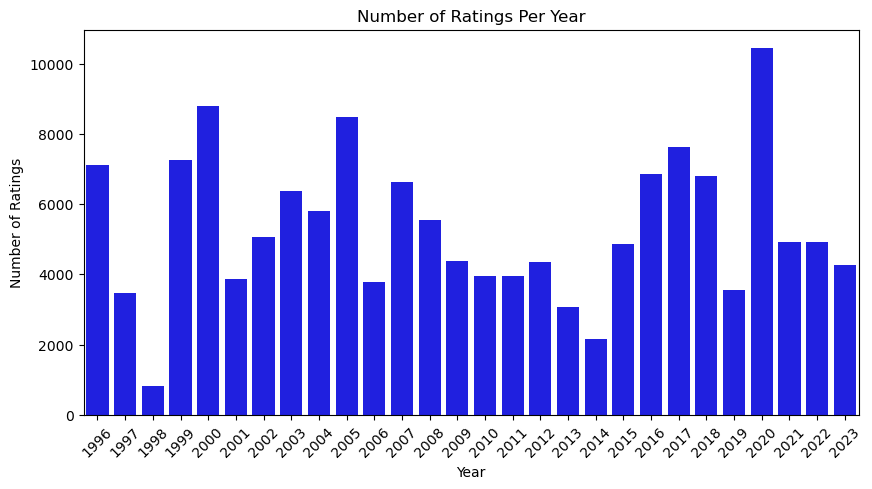

In [30]:
ratings_per_year = df_sample.groupby('year').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=ratings_per_year.index, y=ratings_per_year.values, color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings Per Year")
plt.xticks(rotation=45)
plt.show()


In [40]:
top_5_users = df_sample['userId'].value_counts().head(5)
print(top_5_users)


userId
34919.0     1920
148734.0    1847
36315.0     1836
26087.0     1636
32605.0     1448
Name: count, dtype: int64


In [31]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,year
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,596.0,5.0,1997-05-11 11:42:25,1997
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129431.0,4.5,2020-12-22 17:20:19,2020
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,129309.0,5.0,2008-01-12 16:12:00,2008
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128776.0,3.0,1996-11-16 04:51:18,1996
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,128416.0,3.5,2023-01-15 02:12:03,2023
...,...,...,...,...,...,...,...,...,...
149205,289691,28089651.0,1151353.0,Untold: Johnny Football (2023),Documentary,180749.0,1.5,2023-09-04 20:59:15,2023
149206,289807,21933210.0,1012801.0,Barbie: Mermaid Power (2022),Animation,139369.0,4.0,2023-08-14 02:06:46,2023
149207,290787,15944018.0,1122634.0,Once Upon a Crime (2023),Adventure|Comedy|Fantasy,139369.0,3.5,2023-09-17 15:29:16,2023
149208,291821,41421.0,66867.0,Goofy Gymnastics (1949),Animation|Comedy,139369.0,4.5,2023-09-30 15:14:32,2023


In [32]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149210 entries, 0 to 149209
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    149210 non-null  int64         
 1   imdbId     149210 non-null  float64       
 2   tmdbId     149183 non-null  float64       
 3   title      149210 non-null  object        
 4   genres     149210 non-null  object        
 5   userId     149210 non-null  float64       
 6   rating     149210 non-null  float64       
 7   timestamp  149210 non-null  datetime64[ns]
 8   year       149210 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(2)
memory usage: 9.7+ MB


In [33]:
# Create User-Movie Rating Matrix
rating_matrix = df_sample.pivot(index="userId", columns="movieId", values="rating")

# Fill missing values with NaN
rating_matrix = rating_matrix.fillna(np.nan) 

# Save the matrix
rating_matrix.to_csv("user_movie_matrix.csv")

print("Matrix Shape:", rating_matrix.shape)
print(rating_matrix.head())

Matrix Shape: (1000, 12924)
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
552.0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
561.0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
596.0       5.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
775.0       4.0     3.0     3.0     NaN     3.0     NaN     NaN     NaN   
928.0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  288979  289097  289163  289289  289297  289691  \
userId                   ...                                                   
552.0       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
561.0       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
596.0       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
775.0       NaN     NaN  ...     NaN     NaN  

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Load the matrix
rating_matrix = pd.read_csv("user_movie_matrix.csv", index_col=0)

# Convert to numpy array fill NaN with 0
rating_matrix_filled = rating_matrix.fillna(0).values

# Compute User-User Similarity
user_similarity = cosine_similarity(rating_matrix_filled)

# Convert to DataFrame
user_sim_df = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

print("User-User Similarity Matrix:")
print(user_sim_df.head())


User-User Similarity Matrix:
userId  552.0     561.0     596.0     775.0     928.0     1176.0    2099.0    \
userId                                                                         
552.0   1.000000  0.000000  0.046888  0.020109  0.000000  0.000000  0.032742   
561.0   0.000000  1.000000  0.000000  0.022080  0.186021  0.000000  0.012942   
596.0   0.046888  0.000000  1.000000  0.433618  0.041686  0.000000  0.151443   
775.0   0.020109  0.022080  0.433618  1.000000  0.079857  0.096165  0.089503   
928.0   0.000000  0.186021  0.041686  0.079857  1.000000  0.014007  0.024260   

userId  2129.0    2266.0    2277.0    ...  198045.0  198457.0  199069.0  \
userId                                ...                                 
552.0   0.027076  0.009534  0.000000  ...  0.026636  0.010072  0.022398   
561.0   0.145824  0.175523  0.149731  ...  0.141944  0.095990  0.006886   
596.0   0.247215  0.067417  0.088215  ...  0.284654  0.051981  0.082619   
775.0   0.259193  0.029957  0.07359

In [49]:
# Create the User-Movie Rating Matrix
rating_matrix = df_sample.pivot(index="userId", columns="movieId", values="rating")

# Fill missing values with 0 (can also use mean imputation)
rating_matrix_filled = rating_matrix.fillna(0)

# Compute Movie-Movie Similarity (Item-Based Collaborative Filtering)
movie_similarity = cosine_similarity(rating_matrix_filled.T)

# Convert similarity matrix to DataFrame
movie_sim_df = pd.DataFrame(movie_similarity, index=rating_matrix.columns, columns=rating_matrix.columns)

# Load movie titles
movie_titles = df_sample[['movieId', 'title']].drop_duplicates().set_index('movieId')

def recommend_movies(movie_name, num_recommendations=5):
    """Find similar movies based on item-based collaborative filtering."""
    
    # Find movieId from title
    movie_id = movie_titles[movie_titles['title'].str.contains(movie_name, case=False, na=False)].index
    
    if len(movie_id) == 0:
        return "Movie not found. Please try another title."
    
    movie_id = movie_id[0]  # Take the first match if multiple exist

    # Get similarity scores for this movie
    similar_movies = movie_sim_df[movie_id].sort_values(ascending=False).drop(movie_id)
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df_sample = pd.read_csv("sample_dataset.csv")

# Create User-Movie Rating Matrix
rating_matrix = df_sample.pivot(index="userId", columns="movieId", values="rating")

# Compute Movie-Movie Similarity (Collaborative Filtering)
rating_matrix_filled = rating_matrix.fillna(0)
movie_similarity_cf = cosine_similarity(rating_matrix_filled.T)
movie_sim_cf_df = pd.DataFrame(movie_similarity_cf, index=rating_matrix.columns, columns=rating_matrix.columns)

# Load movie metadata 
movie_metadata = df_sample[['movieId', 'title', 'genres']].drop_duplicates().set_index('movieId')

# Compute Content-Based Similarity (TF-IDF on genres)
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movie_metadata['genres'].fillna(""))
movie_similarity_content = cosine_similarity(tfidf_matrix)
movie_sim_content_df = pd.DataFrame(movie_similarity_content, index=movie_metadata.index, columns=movie_metadata.index)

# Hybrid Recommendation Function
def recommend_hybrid(movie_name, num_recommendations=5, alpha=0.5):
    """
    Recommend movies based on a hybrid of collaborative filtering and content-based filtering.
    alpha controls weighting (0 = only content, 1 = only collaborative).
    """
    # Find movieId from title
    movie_id = movie_metadata[movie_metadata['title'].str.contains(movie_name, case=False, na=False)].index
    
    if len(movie_id) == 0:
        return "Movie not found. Please try another title."
    
    movie_id = movie_id[0]  # Take the first match if multiple exist
    
    # Get similarity scores from both methods
    similar_movies_cf = movie_sim_cf_df[movie_id]
    similar_movies_content = movie_sim_content_df[movie_id]
    
    # Hybrid score = weighted sum of collaborative and content-based similarity
    hybrid_score = alpha * similar_movies_cf + (1 - alpha) * similar_movies_content
    hybrid_score = hybrid_score.sort_values(ascending=False).drop(movie_id)
    
    # Get top N recommended movies
    recommended_movies = hybrid_score.head(num_recommendations).index
    return movie_metadata.loc[recommended_movies]




In [50]:
# Usage
movie_input = "Shawshank"  #  movie title
recommendations = recommend_hybrid(movie_input, 5, alpha=0.7)  # 70% collaborative, 30% content
print("Recommended Movies:\n", recommendations)

Recommended Movies:
                                   title                       genres
movieId                                                             
858               Godfather, The (1972)                  Crime|Drama
296                 Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller
1213                  Goodfellas (1990)                  Crime|Drama
3147             Green Mile, The (1999)                  Crime|Drama
1221     Godfather: Part II, The (1974)                  Crime|Drama
